In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
events = pd.read_csv('events_data.csv')
events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [4]:
db_connection = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone1"
)

In [5]:
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'Capstone1'"

table_names_df = pd.read_sql(query, con=db_connection)
print(table_names_df)

# db_connection.close()

/var/folders/1d/mdmrk41x47s4tlnxhhhbfp6m0000gq/T/ipykernel_50478/1916600559.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_names_df = pd.read_sql(query, con=db_connection)


                 TABLE_NAME
0               events_data
1          gender_age_train
2  phone_brand_device_model


In [6]:
gen_age_query = "SELECT * FROM gender_age_train"
gen_age = pd.read_sql(gen_age_query, con=db_connection)

/var/folders/1d/mdmrk41x47s4tlnxhhhbfp6m0000gq/T/ipykernel_50478/1989087603.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gen_age = pd.read_sql(gen_age_query, con=db_connection)


In [7]:
phone_brand_device_model_query = "SELECT * FROM phone_brand_device_model"
phone = pd.read_sql(phone_brand_device_model_query, con=db_connection)

/var/folders/1d/mdmrk41x47s4tlnxhhhbfp6m0000gq/T/ipykernel_50478/892333650.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  phone = pd.read_sql(phone_brand_device_model_query, con=db_connection)


In [8]:
gen_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [9]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
gen_age.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [11]:
phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [12]:
# Convert negative device IDs to positive values 
gen_age_df = gen_age.copy()
gen_age_df['device_id'] = gen_age_df['device_id'].abs()

phone_df = phone.copy()
phone_df['device_id'] = phone_df['device_id'].abs()

events_df = events.copy()
events_df['device_id'] = events_df['device_id'].abs()


#### Data cleaning in events df

##### Check for duplicate entries in events based on event_id

In [13]:
dup_events = events_df[events_df.duplicated(subset='event_id', keep='first')]

# Remove duplicate entries
events_cleaned = events_df.drop_duplicates(subset='event_id', keep='first')

# Display the cleaned DataFrame
print(events_cleaned)


         event_id     device_id            timestamp  longitude   latitude   
0         2765368  2.973348e+18  2016-05-07 22:52:05  77.225676  28.730140  \
1         2955066  4.734221e+18  2016-05-01 20:44:16  88.388361  22.660325   
2          605968  3.264500e+18  2016-05-02 14:23:04  77.256809  28.757906   
3          448114  5.731369e+18  2016-05-03 13:21:16  80.343613  13.153332   
4          665740  3.388880e+17  2016-05-06 03:51:05  85.997745  23.842609   
...           ...           ...                  ...        ...        ...   
3252945   2687452  1.937028e+18  2016-05-07 23:33:14  73.891597  18.544124   
3252946   1051580  3.345851e+18  2016-05-03 05:13:30  72.837258  19.018432   
3252947   1316227  6.406040e+18  2016-05-01 16:03:28  77.235578  28.764065   
3252948    381262  2.920741e+18  2016-05-05 17:22:36  83.326044  17.765488   
3252949    522592  3.212750e+18  2016-05-07 17:34:18  77.308533   9.779918   

                  city          state  
0                Delhi 

In [14]:
events_df.dtypes

event_id       int64
device_id    float64
timestamp     object
longitude    float64
latitude     float64
city          object
state         object
dtype: object

In [15]:
# Check for missing values in 'city' and 'state' columns
missing_city = events_df[events_df['city'].isnull()]
missing_state = events_df[events_df['state'].isnull()]

# Handle missing values - Option 1: Impute missing values
events_df['city'].fillna('Unknown', inplace=True)
events_df['state'].fillna('Unknown', inplace=True)

# Handle missing values - Option 2: Remove incomplete records
events_cleaned = events_df.dropna(subset=['city', 'state'])

# Display rows with missing 'city' and 'state' values
print("Rows with missing 'city' values:")
print(missing_city)
print("Rows with missing 'state' values:")
print(missing_state)


Rows with missing 'city' values:
Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []
Rows with missing 'state' values:
         event_id     device_id            timestamp  longitude   latitude   
2931       706554  5.829328e+18  2016-05-05 16:58:46  73.851671  18.593313  \
16243     1918653  3.137054e+18  2016-05-03 00:46:10  83.326714  17.829748   
26956     1068940  1.752057e+18  2016-05-04 16:09:17  75.930969  22.818845   
30889     2164200  3.945827e+17  2016-05-04 19:33:09  83.366564  17.757190   
32685      460124  5.536513e+18  2016-05-01 21:30:10  80.359796  13.128174   
...           ...           ...                  ...        ...        ...   
3210326   1070365  5.858653e+18  2016-05-07 17:03:06  88.619418  25.484459   
3226848    145171  4.620271e+18  2016-05-07 20:38:45  87.812710  22.957980   
3235317    210361  8.340098e+18  2016-05-05 20:53:20  77.305988  28.688980   
3236931   2738361  4.113023e+18  2016-05-02 18:15:0

In [16]:
# Check for outliers in 'longitude' and 'latitude' columns
outliers_longitude = events_df[(events_df['longitude'] < -180) | (events_df['longitude'] > 180)]
outliers_latitude = events_df[(events_df['latitude'] < -90) | (events_df['latitude'] > 90)]

# Handle outliers - Option 1: Remove rows with outliers
events_cleaned = events_df[
    (events_df['longitude'] >= -180) & (events_df['longitude'] <= 180) &
    (events_df['latitude'] >= -90) & (events_df['latitude'] <= 90)
]

# Handle outliers - Option 2: Impute outliers with appropriate values
# For example, you can replace outliers with the mean or median of the respective column.

# Display rows with outliers in 'longitude' and 'latitude' columns
print("Rows with outliers in 'longitude':")
print(outliers_longitude)
print("Rows with outliers in 'latitude':")
print(outliers_latitude)


Rows with outliers in 'longitude':
Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []
Rows with outliers in 'latitude':
Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []


##### Checking for duplicates in gen_age_df based on device_id

In [17]:
gen_age_df_dup = gen_age_df[gen_age_df.duplicated(subset='device_id', keep='first')]

gen_age_df_dup

,device_id,gender,age,group


In [18]:
#Removing duplicate entries
gen_age_df_cleaned = gen_age_df.drop_duplicates(subset='device_id', keep='first')

# Display the cleaned DataFrame
gen_age_df_cleaned


,device_id,gender,age,group
0,8076087639492063270,M,35,M32-38
1,2897161552818060146,M,35,M32-38
2,8260683887967679142,M,35,M32-38
3,4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


##### Validating gender column values

In [19]:
expected_genders = ['M', 'F']
invalid_genders = gen_age_df[~gen_age_df['gender'].isin(expected_genders)]

# Remove rows with invalid 'gender' values
gen_age_df_cleaned = gen_age_df[gen_age_df['gender'].isin(expected_genders)]

# Display rows with invalid 'gender' values
print("Rows with invalid 'gender' values:")
print(invalid_genders)


Rows with invalid 'gender' values:
Empty DataFrame
Columns: [device_id, gender, age, group]
Index: []


##### Validating age columns

In [20]:
min_age = 0
max_age = 100

invalid_age_range = gen_age_df[(gen_age_df['age'] < min_age) | (gen_age_df['age'] > max_age)]

# Remove rows with invalid 'age' values
gen_age_df_cleaned = gen_age_df[(gen_age_df['age'] >= min_age) & (gen_age_df['age'] <= max_age)]

# Display rows with invalid 'age' values
print("Rows with invalid 'age' values:")
print(invalid_age_range)


Rows with invalid 'age' values:
Empty DataFrame
Columns: [device_id, gender, age, group]
Index: []


##### Checking for missing values in 'group' columns

In [21]:
missing_groups = gen_age_df[gen_age_df['group'].isnull()]

# Remove rows with missing 'group' values
gen_age_df_cleaned = gen_age_df.dropna(subset=['group'])

# Display rows with missing 'group' values
print("Rows with missing 'group' values:")
print(missing_groups)

# Check for unique values in 'group' column
unique_groups = gen_age_df['group'].unique()

# Display unique values in 'group' column
print("Unique values in 'group' column:")
print(unique_groups)


Rows with missing 'group' values:
Empty DataFrame
Columns: [device_id, gender, age, group]
Index: []
Unique values in 'group' column:
['M32-38' 'M29-31' 'F24-26' 'F33-42' 'F27-28' 'M39+' 'M23-26' 'M27-28'
 'M22-' 'F43+' 'F23-' 'F29-32']


##### Checking for duplicate entries in phone_df based on device_id column

In [22]:
duplicate_entries = phone_df[phone_df.duplicated(subset='device_id', keep='first')]

# Remove duplicate entries
phone_df_cleaned = phone_df.drop_duplicates(subset='device_id', keep='first')

# Display the cleaned DataFrame
print(phone_df_cleaned)


                 device_id phone_brand device_model
0      1877775838486905855        vivo          Y13
1      3766087376657242966          小米         V183
2      6238937574958215831        OPPO          R7s
3      8973197758510677470          三星        A368t
4      2015528097870762664          小米      红米Note2
...                    ...         ...          ...
87721  4961458925928574032          华为       荣耀畅玩4X
87722  8819817317449262375          华为          荣耀6
87723  3358291377416935026          华为        荣耀畅玩4
87724  3282788959750981633          小米         MI 2
87725  2491639413207286271          酷比           M1

[87726 rows x 3 columns]


##### Validating values in 'phone_brand' column are consistent

In [23]:
# Check for unique values in 'phone_brand' column
unique_phone_brands = phone_df['phone_brand'].unique()

print("Unique values in 'phone_brand' column:")
print(unique_phone_brands)

Unique values in 'phone_brand' column:
['vivo' '小米' 'OPPO' '三星' '酷派' '联想 ' '华为' '奇酷' '魅族' '斐讯' '中国移动' 'HTC' '天语'
 '至尊宝' 'LG' '欧博信' '优米' 'ZUK' '努比亚' '惠普' '尼比鲁' '美图' '乡米' '摩托罗拉' '梦米' '锤子'
 '富可视' '乐视' '海信' '百立丰' '一加' '语信' '海尔' '酷比' '纽曼' '波导' '朵唯' '聆韵' 'TCL' '酷珀'
 '爱派尔' 'LOGO' '青葱' '果米' '华硕' '昂达' '艾优尼' '康佳' '优购' '邦华' '赛博宇华' '黑米' 'Lovme'
 '先锋' 'E派' '神舟' '诺基亚' '普耐尔' '糖葫芦' '亿通' '欧新' '米奇' '酷比魔方' '蓝魔' '小杨树' '贝尔丰'
 '糯米' '米歌' 'E人E本' '西米' '大Q' '台电' '飞利浦' '唯米' '大显' '长虹' '维图' '青橙' '本为' '虾米'
 '夏新' '帷幄' '百加' 'SUGAR' '欧奇' '世纪星' '智镁' '欧比' '基伍' '飞秒' '德赛' '易派' '谷歌'
 '金星数码' '广信' '诺亚信' 'MIL' '白米' '大可乐' '宝捷讯' '优语' '首云' '瑞米' '瑞高' '沃普丰' '摩乐'
 '鲜米' '凯利通' '唯比' '欧沃' '丰米' '恒宇丰' '奥克斯' '西门子' '欧乐迪' 'PPTV']


##### Validating 'device_model' is consistent 

In [24]:
# Check for unique values in 'device_model' column
unique_device_models = phone_df['device_model'].unique()

print("Unique values in 'device_model' column:")
print(unique_device_models)

Unique values in 'device_model' column:
['Y13' 'V183' 'R7s' ... 'Galaxy Tab S T705' 'IVO 8800' 'U59GT']


In [25]:
# Merge gen_age_df and phone_df based on 'device_id'
merged_data = gen_age_df.merge(phone_df, on='device_id', how='left')

# Merge merged_data and events based on 'device_id'
merged_data = merged_data.merge(events, on='device_id', how='left')

merged_data

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,8076087639492063270,M,35,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
1,2897161552818060146,M,35,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
2,8260683887967679142,M,35,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
3,4938849341048082022,M,30,M29-31,三星,Galaxy S4,NaN,NaN,NaN,NaN,NaN,NaN
4,245133531816851882,M,30,M29-31,SUGAR,时尚手机,1051738.0,2016-05-07 20:09:19,77.738434,27.575918,Mathura,UttarPradesh
...,...,...,...,...,...,...,...,...,...,...,...,...
1700282,89181010588227347,M,25,M23-26,华为,Ascend P8,1886271.0,2016-05-04 14:02:11,77.648603,13.012240,Bangalore,Karnataka
1700283,89181010588227347,M,25,M23-26,华为,Ascend P8,2218742.0,2016-05-05 19:28:40,77.648603,13.012240,Bangalore,Karnataka
1700284,89181010588227347,M,25,M23-26,华为,Ascend P8,2243803.0,2016-05-06 17:12:46,77.648603,13.012240,Bangalore,Karnataka
1700285,89181010588227347,M,25,M23-26,华为,Ascend P8,228053.0,2016-05-01 15:05:39,77.648603,13.012240,Bangalore,Karnataka


In [28]:
events['timestamp'] = pd.to_datetime(events['timestamp'])  # Convert to datetime

events['day_of_week'] = events['timestamp'].dt.dayofweek  # Extract day of the week
events

,event_id,device_id,timestamp,longitude,latitude,city,state,day_of_week
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,5
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,6
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,0
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,1
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,4
...,...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,5
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,1
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,6
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,3


In [30]:
events['time_of_day'] = pd.cut(events['timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
events

,event_id,device_id,timestamp,longitude,latitude,city,state,day_of_week,time_of_day
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,5,Evening
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,6,Evening
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,0,Afternoon
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,1,Afternoon
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,4,Night
...,...,...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,5,Evening
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,1,Night
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,6,Afternoon
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,3,Afternoon


In [31]:
events['hour_of_day'] = events['timestamp'].dt.hour
events

,event_id,device_id,timestamp,longitude,latitude,city,state,day_of_week,time_of_day,hour_of_day
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,5,Evening,22
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,6,Evening,20
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,0,Afternoon,14
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,1,Afternoon,13
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,4,Night,3
...,...,...,...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,5,Evening,23
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,1,Night,5
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,6,Afternoon,16
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,3,Afternoon,17


In [32]:
events['month'] = events['timestamp'].dt.month
events

,event_id,device_id,timestamp,longitude,latitude,city,state,day_of_week,time_of_day,hour_of_day,month
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,5,Evening,22,5
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,6,Evening,20,5
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,0,Afternoon,14,5
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,1,Afternoon,13,5
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,4,Night,3,5
...,...,...,...,...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,5,Evening,23,5
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,1,Night,5,5
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,6,Afternoon,16,5
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,3,Afternoon,17,5


In [34]:
selected_states = ['MadhyaPradesh', 'Chhattisgarh', 'Uttaranchal', 'JammuandKashmir', 'Goa', 'Nagaland']

# Filter events data for the selected states
filtered_events = events[events['state'].isin(selected_states)]

# Filter gen_age_df for the selected states
filtered_gen_age_df = gen_age_df[gen_age_df['device_id'].isin(filtered_events['device_id'])]

# Filter phone_df for the selected states
filtered_phone_df = phone_df[phone_df['device_id'].isin(filtered_events['device_id'])]

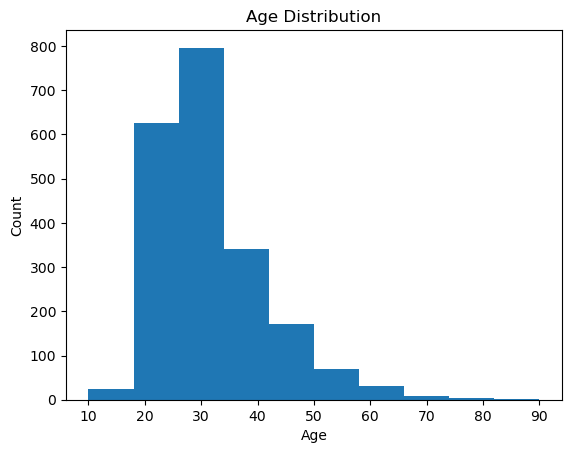

In [36]:
# Histogram of age distribution
plt.hist(filtered_gen_age_df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

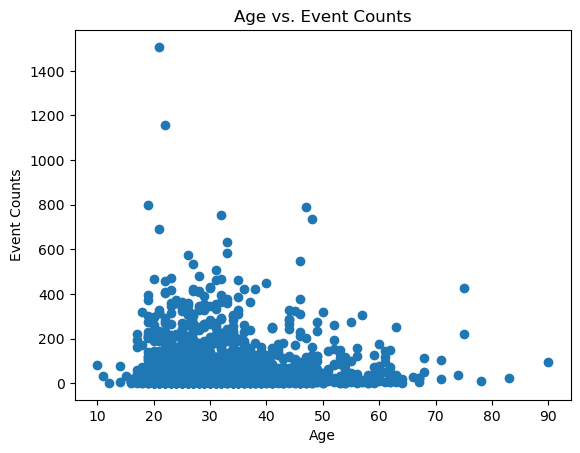

In [38]:
# Calculate event counts per age group
age_event_counts = filtered_gen_age_df.merge(filtered_events.groupby('device_id').size().rename('event_counts'), on='device_id')

# Scatter plot of age vs. event counts
plt.scatter(age_event_counts['age'], age_event_counts['event_counts'])
plt.xlabel('Age')
plt.ylabel('Event Counts')
plt.title('Age vs. Event Counts')
plt.show()


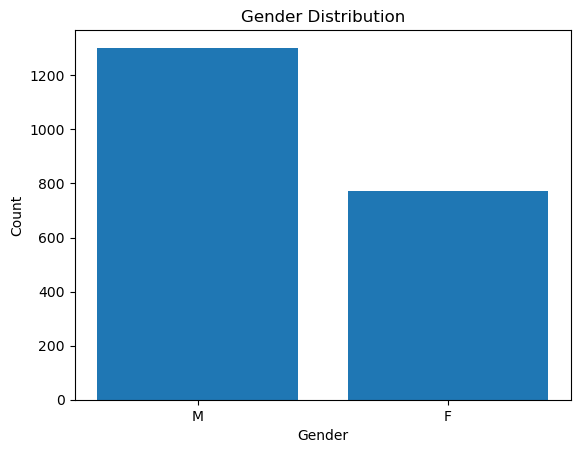

In [39]:
# Bar plot of gender distribution
gender_counts = filtered_gen_age_df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


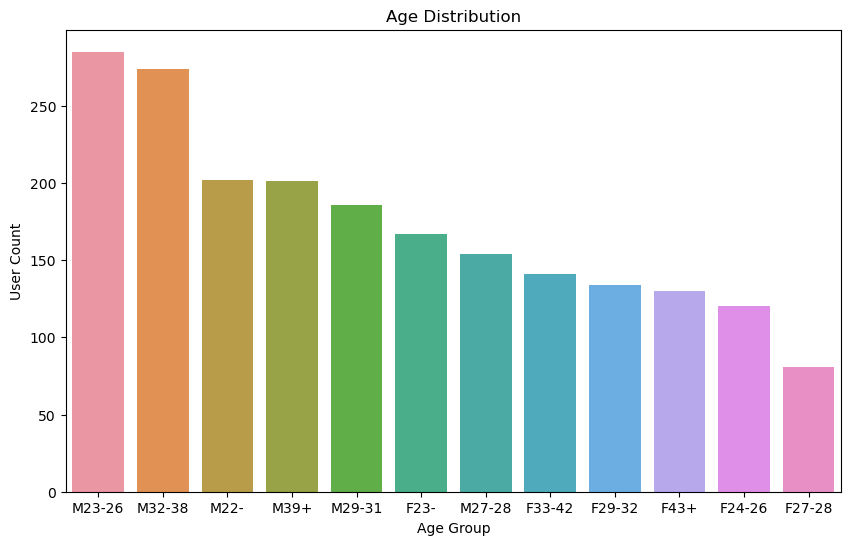

In [42]:

# Age Distribution
age_counts = filtered_gen_age_df['group'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.title('Age Distribution')
plt.show()

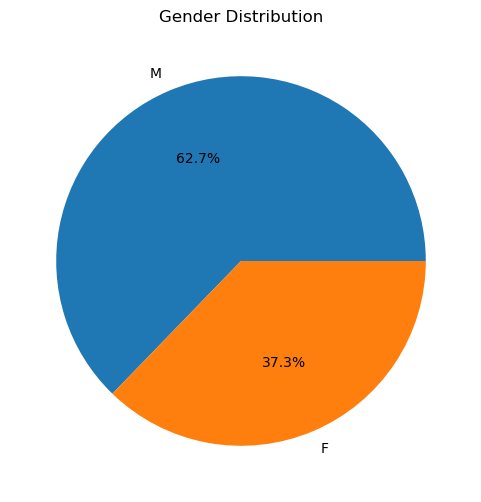

In [43]:
# Gender Distribution
gender_counts = filtered_gen_age_df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

/Users/x301778/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/x301778/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/x301778/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/x301778/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/x301778/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGR

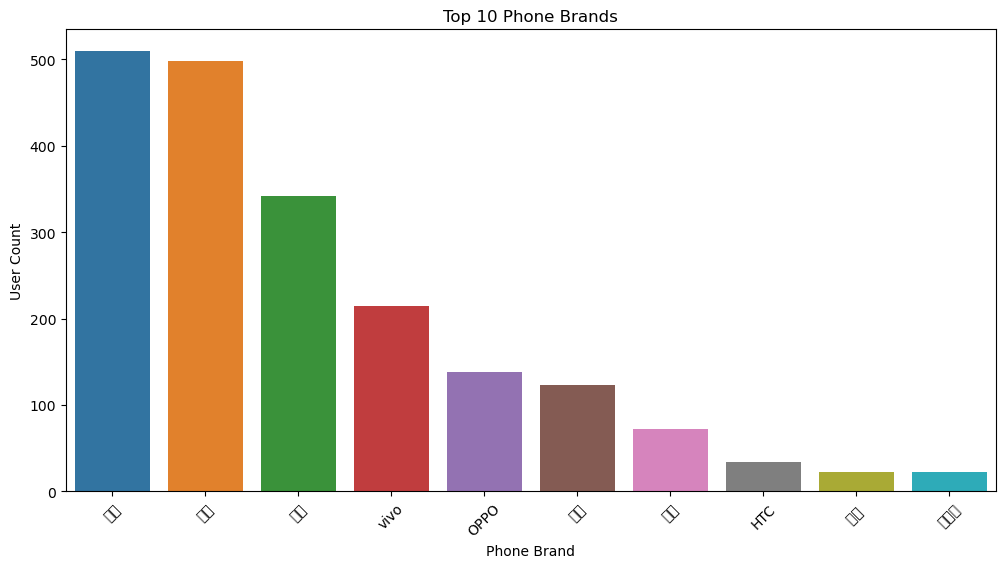

In [44]:
# Phone Brand Preference
phone_brand_counts = filtered_phone_df['phone_brand'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=phone_brand_counts.index, y=phone_brand_counts.values)
plt.xlabel('Phone Brand')
plt.ylabel('User Count')
plt.title('Top 10 Phone Brands')
plt.xticks(rotation=45)
plt.show()

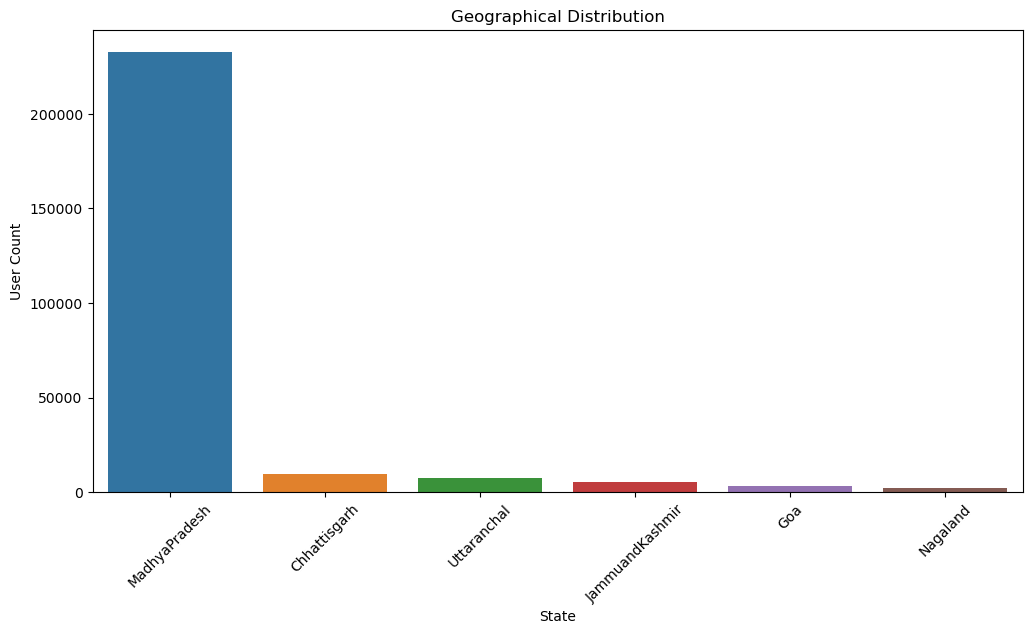

In [45]:

# Geographical Distribution
state_counts = filtered_events['state'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('State')
plt.ylabel('User Count')
plt.title('Geographical Distribution')
plt.xticks(rotation=45)
plt.show()